In [1]:
import os,pandas as pd,numpy as np,matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
yields = pd.read_csv("HW4_yields.csv",sep=',',header=0)
factors = pd.read_csv("HW4_Factors.csv",sep=',',header=0)
pimco = pd.read_csv("HW4_PIMCO.csv",sep=',',header=0)
treasury = pd.read_csv("HW4_Treasury.csv",sep=',',header=0)
credit = pd.read_csv("HW4_Credit.csv",sep=',',header=0)

# Part 1: Understanding PIMCO Returns

#### Question 1: Still need the t-stat

The mean return for PIMCO is:  0.00699131785714
The standard deviation of returns for PIMCO is:  0.0124822380286


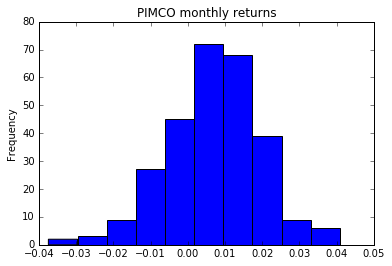

In [3]:
pimco['return'].plot(kind='hist',title='PIMCO monthly returns')
print "The mean return for PIMCO is: ",pimco['return'].mean()
print "The standard deviation of returns for PIMCO is: ",pimco['return'].std()

#### Question 2: t-stat's required

In [31]:
q2 = pd.merge(factors,pimco,on=['year','month'],how='left')
q2['y'] = q2['return'] - q2['Rf']
q2['b1'] = q2['US Stock (CRSP Value-Weighted)'] - q2['Rf']
q2['b2'] = q2['US Aggregate Bond'] - q2['Rf']

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(q2.b1.reshape((280,1)),q2.y)
print "For the US Stock (CRSP Value-Weighted):"
print "Beta is: ",model1.coef_[0]
print "Alpha is: ",model1.intercept_
print "The R^2 is: ",model1.score(q2['b1'].reshape((280,1)),q2['y']),"\n"

model2 = LinearRegression()
model2.fit(q2['b2'].reshape((280,1)),q2['y'])
print model2.fit(q2['b2'].reshape((280,1)),q2['y'])
print "For the US Aggregate Bond:"
print "Beta is: ",model2.coef_[0]
print "Alpha is: ",model2.intercept_
print "The R^2 is: ",model2.score(q2['b2'].reshape((280,1)),q2['y'])

For the US Stock (CRSP Value-Weighted):
Beta is:  0.0427853211093
Alpha is:  0.00347062593574
The R^2 is:  0.025315756498 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
For the US Aggregate Bond:
Beta is:  1.03705427256
Alpha is:  0.000782969460732
The R^2 is:  0.904696154796


#### Question 3: Still require t-stats and explanation

In [5]:
for col in treasury.columns.values[2:]:
    print col    
    print "Mean: ",treasury[col].mean()
    print "Std: ",treasury[col].std(),"\n"

Barclays US Treasury 2yr
Mean:  0.00462723053571
Std:  0.00568652252488 

 Barclays US Treasury 5yr
Mean:  0.00566011325
Std:  0.0135224636511 

 Barclays US Treasury 10yr
Mean:  0.00601839536429
Std:  0.0212795808302 

 Barclays US Treasury 30yr
Mean:  0.00712134668214
Std:  0.0342851203816 



#### Question 4: Needs more analysis

In [6]:
q4 = pd.merge(pimco,treasury,on=['year','month'],how='left')
q4 = pd.merge(q4,factors,on=['year','month'],how='left')
q4['y'] = q4['return'] - q4['Rf']
q4['b1'] = q4['Barclays US Treasury 2yr'] - q4['Rf']
q4['b2'] = q4[' Barclays US Treasury 5yr'] - q4['Rf']
q4['b3'] = q4[' Barclays US Treasury 10yr'] - q4['Rf']
q4['b4'] = q4[' Barclays US Treasury 30yr'] - q4['Rf']

model3 = LinearRegression()
model3.fit(q4[['b1','b2','b3','b4']],q4.y)
print "Beta is: ",model3.coef_
print "Alpha is: ",model3.intercept_

Beta is:  [ 1.1045935  -0.49543031  0.67896917 -0.07855911]
Alpha is:  0.00185300116162


#### Question 5

In [7]:
treasury[list(treasury.columns.values[2:])].corr()

,Barclays US Treasury 2yr,Barclays US Treasury 5yr,Barclays US Treasury 10yr,Barclays US Treasury 30yr
Barclays US Treasury 2yr,1.000000,0.924646,0.816338,0.670405
Barclays US Treasury 5yr,0.924646,1.000000,0.952755,0.830665
Barclays US Treasury 10yr,0.816338,0.952755,1.000000,0.939611
Barclays US Treasury 30yr,0.670405,0.830665,0.939611,1.000000


#### Question 6 isn't a question but Question 7 is.

In [8]:
treasury[list(treasury.columns.values[2:])].cov()

,Barclays US Treasury 2yr,Barclays US Treasury 5yr,Barclays US Treasury 10yr,Barclays US Treasury 30yr
Barclays US Treasury 2yr,0.000032,0.000071,0.000099,0.000131
Barclays US Treasury 5yr,0.000071,0.000183,0.000274,0.000385
Barclays US Treasury 10yr,0.000099,0.000274,0.000453,0.000686
Barclays US Treasury 30yr,0.000131,0.000385,0.000686,0.001175


#### Question 8

In [36]:
w, v = np.linalg.eig(treasury[treasury.columns.values[2:]].cov().as_matrix())
print w
print v

[  1.75067938e-03   8.31706894e-05   1.82347486e-06   7.81005826e-06]
[[ 0.10230838  0.34782077 -0.68793983 -0.6287229 ]
 [ 0.29080538  0.63264996  0.64704558 -0.31067391]
 [ 0.49749406  0.43529463 -0.32432089  0.67663447]
 [ 0.81084208 -0.53785995  0.05372858 -0.22439926]]


#### Question 10

In [48]:
treasury['PC1'] = v[0][0] * treasury['Barclays US Treasury 2yr'] + v[1][0] * treasury[' Barclays US Treasury 5yr'] + v[2][0] * treasury[' Barclays US Treasury 10yr'] + v[3][0] * treasury[' Barclays US Treasury 30yr']
print "The variance is: ",treasury.PC1.var()
print "The eigenvalue is also: ",w[0]

The variance is:  0.00175067937895
The eigenvalue is also:  0.00175067937895


#### Question 12

In [49]:
treasury['PC2'] = v[0][1] * treasury['Barclays US Treasury 2yr'] + v[1][1] * treasury[' Barclays US Treasury 5yr'] + v[2][1] * treasury[' Barclays US Treasury 10yr'] + v[3][1] * treasury[' Barclays US Treasury 30yr']
print "The variance is: ",treasury.PC2.var()
print "The eigenvalue is also: ",w[1]

The variance is:  8.31706894409e-05
The eigenvalue is also:  8.31706894409e-05


#### Question 13: Still need to divide by sum G and sum D

In [50]:
treasury[['PC1','PC2']].corr()

,PC1,PC2
PC1,1.000000e+00,6.665416e-16
PC2,6.665416e-16,1.000000e+00


# Part 2: The Vasicek Model

### Question 1: Estimation using Time-Series Data

In [10]:
yields['forward'] = yields.yield3mo.shift(1)

In [11]:
yields.tail()

,date,yield3mo,yield1,yield2,yield3,yield4,yield5,forward
650,20060831,0.048762,0.048095,0.045986,0.045298,0.045212,0.045231,0.049400
651,20060929,0.047408,0.047513,0.044983,0.044409,0.044199,0.044132,0.048762
652,20061031,0.049181,0.047389,0.045222,0.044352,0.044055,0.044026,0.047408
653,20061130,0.048781,0.046931,0.044457,0.043328,0.042935,0.042906,0.049181
654,20061229,0.048676,0.048190,0.046082,0.045423,0.045203,0.045184,0.048781


#### Question 1: Part (a)

In [12]:
model4 = LinearRegression()
model4.fit(yields.yield3mo[:-1].reshape((654,1)),yields.forward[1:])
print "Beta is: ",model4.coef_[0]
print "Alpha is: ",model4.intercept_

Beta is:  1.0
Alpha is:  6.93889390391e-18


#### Question 1: Part (b)

In [13]:
print "The mean for 3 month yield return is: ",yields.yield3mo.mean()

The mean for 3 month yield return is:  0.0499693177328


In [23]:
yields['y'] = yields['forward'] - yields['yield3mo']
yields['val'] = ((yields['yield3mo'] * -1) + yields.yield3mo.mean())*(1/12.0)

In [51]:
model5 = LinearRegression()
model5.fit(yields.val[1:].reshape((654,1)),yields.y[1:])
print "k value is: ",model5.coef_[0]

k value is:  0.160404979981
The sigma value for volatility of 3-month treasury rates is:  0.0270439622119


#### Question 1: Part (c)

In [52]:
print "The sigma value for volatility of 3-month treasury rates is: ",yields.yield3mo.std()

The sigma value for volatility of 3-month treasury rates is:  0.0270439622119


### Question 2: Bond Valuation